In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

df=pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/wine/wine.data',
         header=None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
              'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=y,random_state=42)
df.head()

## PART 1 RF estimators

for i in [1,10,50,100,500,1000]:
    rf=RandomForestClassifier(criterion='gini', n_estimators=i,random_state=1,n_jobs=-1)
    rf.fit(X_train,y_train)
    scores=cross_val_score(rf,X_train,y_train,cv=10)
    print("n_estimators =",i,"; CV score(in sample)=","%.4f"%np.mean(scores),"; test score =", "%.4f"%rf.score(X_test,y_test))
  


n_estimators = 1 ; CV score(in sample)= 0.8542 ; test score = 0.8889
n_estimators = 10 ; CV score(in sample)= 0.9431 ; test score = 0.9444
n_estimators = 50 ; CV score(in sample)= 0.9749 ; test score = 1.0000
n_estimators = 100 ; CV score(in sample)= 0.9749 ; test score = 1.0000
n_estimators = 500 ; CV score(in sample)= 0.9815 ; test score = 1.0000
n_estimators = 1000 ; CV score(in sample)= 0.9815 ; test score = 1.0000


 1) Proline                        0.207577
 2) Color intensity                0.160063
 3) Flavanoids                     0.143147
 4) Alcohol                        0.109750
 5) OD280/OD315 of diluted wines   0.098841
 6) Hue                            0.067972
 7) Magnesium                      0.054609
 8) Malic acid                     0.051281
 9) Total phenols                  0.030228
10) Proanthocyanins                0.027812
11) Alcalinity of ash              0.026078
12) Ash                            0.011610
13) Nonflavanoid phenols           0.011031


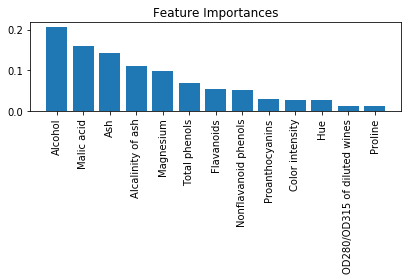

In [57]:
# PART 2 feature importance

feat_labels=df.columns[1:]
rf=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)

importances=forest.feature_importances_

indices=np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

    
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.savefig('feature importances.png')
plt.show()


In [39]:
print("My name is Xiaoman Gong")
print("My NetID is: xiaoman5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xiaoman Gong
My NetID is: xiaoman5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
